In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import matplotlib.transforms as mtransforms
from model_parameters import *

# HV function 
def heav(X):
    if X <= 0:
        return 0
    elif X>0:
        return 1

# SSA function

In [10]:

def run_():
   
    
    """
    Model parameters
    """
    r_glucose =0.0077
    cell_size=0.65
    f_mean = 0.55
    f_CV = 0.1
    S0_mean = 0.60
    S0_CV = 0.1    
    SPN_mean = 0.07
    SPN_CV = 0.03
    SPO_mean = 0.07
    SPO_CV = 0.03
    S0_log = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]


    """
    Propensity values
    """
    param_dict = {"cln3":1,
                 "whi5":1,
                 "sbf":1,
                 "cln2":1,
                 "mbf":1,
                 "clb5":1,
                 "clb2G":1,
                 "cdc5":1,
                 "mcm1":1,
                 "clb2M":1,
                 "sac":1,
                 "cdc20":1,
                 "spoc":1,
                 "cdc14":1,
                 "swi5":1,
                 "cdh1":1,
                 "sic1":1,
                 "nrm1":1}
    
    """
    Initial state G1
    """
    
    cln3=0
    whi5=1
    sbf=0
    cln2=0
    mbf=0
    clb5=0
    ori=0
    mcm1=0
    clb2G=0
    clb2M=0
    cdc20=0
    cdc5=0
    cdc14=0
    swi5=0
    cdh1=1
    sic1=1
    nrm1=0
    sac = 0
    spoc= 0
    spn_progress = 0
    spoc_progress = 0
    time_init = 0
    divide_status = ""
    
   
    init_state = [cln3,whi5,sbf,cln2,mbf,clb5,ori,clb2G,cdc5,mcm1,clb2M,sac,cdc20,spoc,cdc14,swi5,cdh1,sic1,nrm1,
                  time_init,cell_size,S0_log,divide_status,spn_progress,spoc_progress]
    
    sim_list = [init_state]

    
    tr_ = 500
    sac_event = [] # to track sac checkpoint event
    
    for j in range(tr_):
        

        cln3_sum = (cell_size >= S0_log)
        whi5_sum = k60 + k61*cdc14 - k62*cln2 - k63*cln3 
        sbf_sum =  k45 + k47*clb5 + k48*cln2 + k49*cln3 - k46*clb2G - k50*whi5 
        cln2_sum = k30 + k31*mbf + k32*sbf 
        mbf_sum  = k33 + k35*clb5 + k36*cln2 + k37*cln3 - k34*clb2G - k38*nrm1 
        clb5_sum = k25 + k27*mbf + k28*sbf - k29*sic1 - k26*cdc20 
        clb2G_sum = k19 - k20*cdh1 - k21*sic1
        clb2M_sum =  k22 + k24*mcm1 - k23*cdc20
        mcm1_sum = k39 + k41*clb2M + k40*clb2G
        cdc5_sum = k9 + k11*clb2G + k12*clb2M - k10*cdh1 
        cdc20_sum =  k6 + k7*mcm1 - k8*sac 
        cdc14_sum = k1 + k2*cdc5 - k5*spoc - k4*sac - k3*clb2M
        swi5_sum =  k57 + k58*cdc14 + k59*mcm1 
        cdh1_sum = k13 + k14*cdc14 - k16*clb2M - k17*clb5 - k18*cln2 - k15*clb2G
        sic1_sum = k51 + k56*swi5 - k53*clb2M - k54*clb5 - k55*cln2 - k52*clb2G
        nrm1_sum = k42 - k43*cdh1 + k44*mbf



        """
        Binarizing the sum variables by Heaviside function
        """
        cln3_new = heav(cln3_sum)
        whi5_new = heav(whi5_sum)
        sbf_new = heav(sbf_sum)
        cln2_new = heav(cln2_sum)
        mbf_new = heav(mbf_sum)
        clb5_new = heav(clb5_sum)
        mcm1_new = heav(mcm1_sum)
        clb2M_new = heav(clb2M_sum)
        cdc20_new = heav(cdc20_sum) 
        cdc5_new = heav(cdc5_sum)
        cdc14_new = heav(cdc14_sum) 
        swi5_new = heav(swi5_sum)
        cdh1_new = heav(cdh1_sum)
        sic1_new = heav(sic1_sum)
        clb2G_new = heav(clb2G_sum)
        nrm1_new = heav(nrm1_sum)



        """
        Which protein is changed ?
        """

        cln3_update = cln3_new - cln3
        whi5_update = whi5_new - whi5
        sbf_update =  sbf_new - sbf
        cln2_update = cln2_new - cln2
        mbf_update  = mbf_new - mbf
        clb5_update = clb5_new - clb5
        mcm1_update = mcm1_new - mcm1
        clb2M_update = clb2M_new - clb2M
        cdc20_update = cdc20_new - cdc20
        cdc5_update = cdc5_new - cdc5
        cdc14_update = cdc14_new - cdc14
        swi5_update = swi5_new - swi5
        cdh1_update = cdh1_new - cdh1
        sic1_update = sic1_new - sic1
        clb2G_update = clb2G_new - clb2G
        nrm1_update = nrm1_new - nrm1


        """
        Generating propensity ranges
        """

        x1 = abs(cln3_update)*param_dict["cln3"]
        x2 = x1 + abs(whi5_update)*param_dict["whi5"]
        x3 = x2 + abs(sbf_update)*param_dict["sbf"]
        x4 = x3 + abs(cln2_update)*param_dict["cln2"]
        x5 = x4 + abs(mbf_update)*param_dict["mbf"]
        x6 = x5 + abs(clb5_update)*param_dict["clb5"]
        x7 = x6 + abs(mcm1_update)*param_dict["mcm1"]
        x8 = x7 + abs(clb2M_update)*param_dict["clb2M"]
        x9 = x8 + abs(cdc20_update)*param_dict["cdc20"]
        x10 = x9 + abs(cdc5_update)*param_dict["cdc5"]
        x11 = x10 + abs(cdc14_update)*param_dict["cdc14"]
        x12 = x11 + abs(swi5_update)*param_dict["swi5"]
        x13 = x12 + abs(cdh1_update)*param_dict["cdh1"]
        x14 = x13 + abs(sic1_update)*param_dict["sic1"]
        x15 = x14 + abs(clb2G_update)*param_dict["clb2G"]
        x16 = x15 + abs(nrm1_update)*param_dict["nrm1"]

        if x16 == 0:
            x17 = 1
        else:
            x17 = x16


        """
        Which protein will be updated ?
        """
        sel = random.uniform(0,1)*x17

        y1 = (sel<=x1)
        y2 = (sel>x1)&(sel<=x2)
        y3 = (sel>x2)&(sel<=x3)
        y4 = (sel>x3)&(sel<=x4)
        y5 = (sel>x4)&(sel<=x5)
        y6 = (sel>x5)&(sel<=x6)
        y7 = (sel>x6)&(sel<=x7)
        y8 = (sel>x7)&(sel<=x8)
        y9 = (sel>x8)&(sel<=x9)
        y10 = (sel>x9)&(sel<=x10)
        y11 = (sel>x10)&(sel<=x11)
        y12 = (sel>x11)&(sel<=x12)
        y13 = (sel>x12)&(sel<=x13)
        y14 = (sel>x13)&(sel<=x14)
        y15 = (sel>x14)&(sel<=x15)
        y16 = (sel>x15)&(sel<=x16)
        y17 = (sel>x16)


        """
        Updating time based on the type of chosen protein
        """
        check_y = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17]
        index_true = check_y.index(True)
        
        if index_true == 16:
            #index_true == 16 means there is no variable changes
            delt = np.random.gamma(5,0.3)

        else:
            
            node_list =  ['cln3', 'whi5', 'sbf', 'cln2', 'mbf', 'clb5', 'mcm1', 'clb2M', 'cdc20', 'cdc5', 'cdc14', 'swi5', 'cdh1', 'sic1', 'clb2G', 'nrm1']
            update_protein = node_list[index_true]
            fast = ["whi5","mbf","sbf","swi5","cdh1","cdc5","mcm1"]
            #cln2,clb5,clb2,cdc20,cdc14,nrm1,sic1,cln3 = slow

            if update_protein in fast:
                delt = np.random.gamma(2,0.3)
            else:
                delt = np.random.gamma(3,0.3)
               
        time_init = time_init + delt


        """
        Updating size
        """ 
        if(clb2G == 1 and clb2G_new == 0 and y15 == 1):
            
            f = np.random.lognormal(np.log(f_mean),f_CV, 1)[0]
            S0_log  = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]
            cell_size = cell_size*math.exp(r_glucose*delt) * f
            divide_status = "divided !!!"

        else:
            cell_size = cell_size*math.exp(r_glucose*delt)
            divide_status = ""



        """
        Updating protein activity
        """

        cln3 = cln3 + cln3_update*y1
        whi5 = whi5 + whi5_update*y2
        sbf =  sbf + sbf_update*y3
        cln2 = cln2 + cln2_update*y4
        mbf =  mbf + mbf_update*y5
        clb5 = clb5 + clb5_update*y6
        mcm1 = mcm1 + mcm1_update*y7
        clb2M = clb2M + clb2M_update *y8
        cdc20 = cdc20 + cdc20_update*y9
        cdc5 = cdc5 + cdc5_update*y10
        cdc14 = cdc14 + cdc14_update*y11
        swi5 = swi5 + swi5_update*y12
        cdh1 = cdh1 + cdh1_update*y13
        sic1 = sic1 + sic1_update*y14
        clb2G = clb2G + clb2G_update*y15
        nrm1 = nrm1 + nrm1_update*y16
        
        
        """
        Forcing cln3 and whi5 to turn on and off based on cell size
        """
 
        if cell_size < S0_log :
            cln3 = 0
        else:
            cln3 = 1 

        """
        Checking when ORI will be licensed and SAC chekpoint will turn ON
        """
    
        # DNA start
        if (clb5 == 1 or clb2M == 1 or clb2G == 1):
            ori = 1
        else:
            ori = 0

        # Spindle Assemly Checkpoint
        if (ori == 1 and spn_progress < 1):
            sac=1
        else:
            sac=0

        ## spindle assembly progress: start when Clb2M is ON
        if(clb2M == 1 and sac == 1):
            
            num =  np.random.lognormal(np.log(SPN_mean),SPN_CV,1)[0]
            spn_progress += num
            
            if spn_progress >= 1:
                spn_progress = 1
         
        
        """
        Checking when SPoC checkpoint will be initiated.
        """
    
        # SPoC Checkpoint
        # 10 = the starting time step for monitoring SAC checkpoint
        if j >= 10:
            t_previous = sac_event[j-2]
            t_current = sac_event[j-1]

            del_sac = t_current-t_previous
        
        if (cdc20 == 1 and del_sac == -1 and spoc_progress < 1):
            spoc = 1
        elif spoc_progress >= 1:
            spoc = 0
        
                
        ## SPoC progress
        if(cdc20 == 1 and spoc == 1):
            num = np.random.lognormal(np.log(SPO_mean),SPO_CV,1)[0]
            spoc_progress += num
            if spoc_progress >= 1:
                spoc_progress = 1
                
                
           
        """
        Resetting progress variables when the progress is done,e.g., spindle progress reset back to zero when anaphase start (cdc20 = 1) 
        """
    
    
        if cdc20 == 1:
            spn_progress = 0
            sac = 0 
        
        if cdc14 == 1:
            spoc_progress = 0
            spoc = 0
     
    
        res_ = [cln3,whi5,sbf,cln2,mbf,clb5,ori,clb2G,cdc5,mcm1,clb2M,sac,cdc20,spoc,cdc14,swi5,cdh1,sic1,nrm1,
                time_init,cell_size,S0_log,divide_status,spn_progress,spoc_progress]   
            
        sim_list.append(res_)
        sac_event.append(sac)
        
    return sim_list

In [11]:
dff = run_()
node_name = ["cln3","whi5","sbf","cln2", "mbf","clb5","ori", "clb2G", "cdc5","mcm1","clb2M","sac", "cdc20","spoc","cdc14","swi5","cdh1","sic1","nrm1"]
df_sim = pd.DataFrame(dff,columns=node_name+["time","cell_size","critical_size","divide status","SPN_p","SPO_p"])
df_sim

,cln3,whi5,sbf,cln2,mbf,clb5,ori,clb2G,cdc5,mcm1,...,swi5,cdh1,sic1,nrm1,time,cell_size,critical_size,divide status,SPN_p,SPO_p
0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0.000000,0.650000,0.601249,,0.000000,0.000000
1,1,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0.691801,0.653472,0.601249,,0.000000,0.000000
2,1,1,0,0,1,0,0,0,0,0,...,0,1,1,0,1.386418,0.656976,0.601249,,0.000000,0.000000
3,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,2.469301,0.662477,0.601249,,0.000000,0.000000
4,1,0,1,0,1,0,0,0,0,0,...,0,1,1,0,2.836516,0.664353,0.601249,,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1,0,0,0,0,0,1,1,1,1,...,0,0,0,1,562.757129,0.790418,0.638389,,0.972986,0.000000
497,1,0,0,0,0,0,1,1,1,1,...,0,0,0,1,563.645422,0.795843,0.638389,,1.000000,0.000000
498,1,0,0,0,0,0,1,1,1,1,...,0,0,0,1,564.875553,0.803417,0.638389,,1.000000,0.000000
499,1,0,0,0,0,0,1,1,1,1,...,0,0,0,1,565.294263,0.806011,0.638389,,0.000000,0.068632


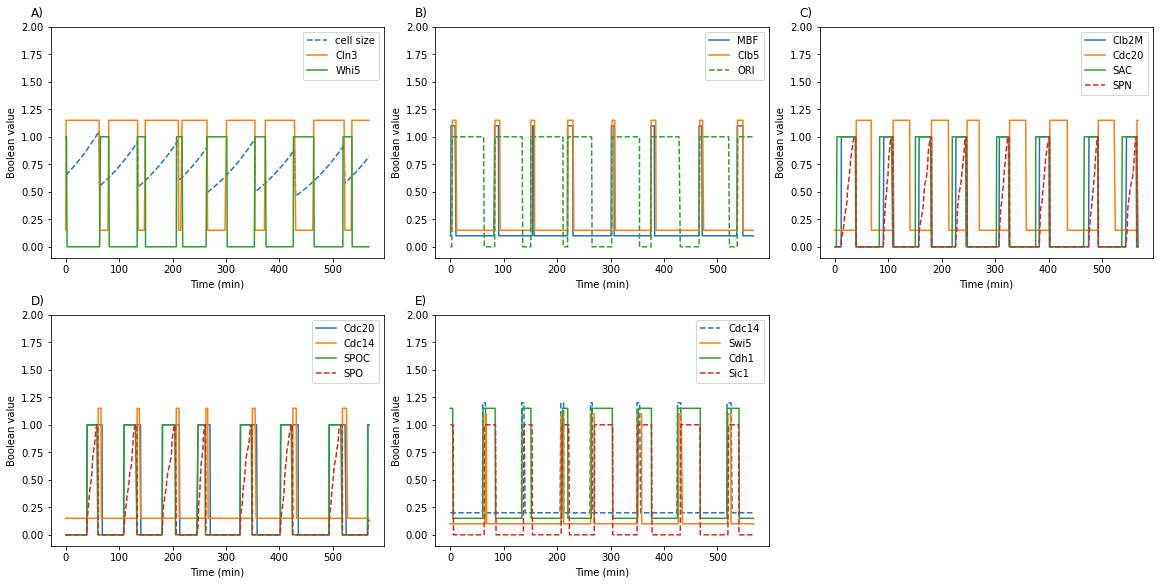

In [12]:
cdc14_ = np.array(df_sim["cdc14"])
cdh1_ = np.array(df_sim["cdh1"])
cln3_ = np.array(df_sim["cln3"])
clb2M_ = np.array(df_sim["clb2M"])
whi5_ = np.array(df_sim["whi5"])
sic1_ = np.array(df_sim["sic1"])
cdc20_ = np.array(df_sim["cdc20"])
swi5_ = np.array(df_sim["swi5"])
cdc5_ = np.array(df_sim["cdc5"])
sbf_ = np.array(df_sim["sbf"])
mbf_ = np.array(df_sim["mbf"])
clb5_ = np.array(df_sim["clb5"])
mcm1_ = np.array(df_sim["mcm1"])
SPN_ = np.array(df_sim["SPN_p"])
sac_ = np.array(df_sim["sac"])
SPOC_ = np.array(df_sim["SPO_p"])
cln2_ = np.array(df_sim["cln2"])
clb2G_ = np.array(df_sim["clb2G"])
spoc_ = np.array(df_sim["spoc"])
ori_ = np.array(df_sim["ori"])
nrm1_ = np.array(df_sim["nrm1"])


ts = np.array(df_sim["time"])
cs = np.array(df_sim["cell_size"])


#Fig2 plot


fig = plt.figure(layout= 'constrained', figsize=(16,8))
axs = fig.subplot_mosaic([['A)', 'B)','C)'],['D)','E)','.']])

#Fig2A
axs['A)'].plot(ts,cs, label ='cell size',linestyle='--')
axs['A)'].plot(ts,cln3_+0.15, label ='Cln3')
axs['A)'].plot(ts,whi5_, label ='Whi5')
axs['A)'].legend(loc="upper right")
axs['A)'].set_ylim([-0.1, 2])
axs['A)'].set_xlabel("Time (min)")
axs['A)'].set_ylabel("Boolean value")



#Fig2B
axs['B)'].plot(ts,mbf_+0.1, label ='MBF')
axs['B)'].plot(ts,clb5_+0.15, label ='Clb5')
axs['B)'].plot(ts,ori_, label ='ORI',linestyle='--')
axs['B)'].legend(loc="upper right")
axs['B)'].set_ylim([-0.1, 2])
axs['B)'].set_xlabel("Time (min)")
axs['B)'].set_ylabel("Boolean value")


#Fig2C
axs['C)'].plot(ts,clb2M_, label ='Clb2M')
axs['C)'].plot(ts,cdc20_+0.15, label ='Cdc20')
axs['C)'].plot(ts,sac_, label ='SAC')
axs['C)'].plot(ts,SPN_, label ='SPN',linestyle='--')
axs['C)'].legend(loc="upper right")
axs['C)'].set_ylim([-0.1, 2])
axs['C)'].set_xlabel("Time (min)")
axs['C)'].set_ylabel("Boolean value")


#Fig2D#
axs['D)'].plot(ts,cdc20_, label ='Cdc20')
axs['D)'].plot(ts,cdc14_+0.15, label ='Cdc14')
axs['D)'].plot(ts,spoc_, label ='SPOC')
axs['D)'].plot(ts,SPOC_, label ='SPO',linestyle='--')
axs['D)'].legend(loc="upper right")
axs['D)'].set_ylim([-0.1, 2])
axs['D)'].set_xlabel("Time (min)")
axs['D)'].set_ylabel("Boolean value")


#Fig2E
axs['E)'].plot(ts,cdc14_+0.2, label ='Cdc14',linestyle='--')
axs['E)'].plot(ts,swi5_+0.1, label ='Swi5')
axs['E)'].plot(ts,cdh1_+0.15, label ='Cdh1')
axs['E)'].plot(ts,sic1_, label ='Sic1',linestyle='--')
axs['E)'].legend(loc="upper right")
axs['E)'].set_ylim([-0.1,2])
axs['E)'].set_xlabel("Time (min)")
axs['E)'].set_ylabel("Boolean value")

for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='large', va='bottom')
